In [29]:
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister
from qiskit import execute, BasicAer
from time import time
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor

In [30]:
q=QuantumRegister(5,'q')
c=ClassicalRegister(5,'c')
circuit=QuantumCircuit(q)

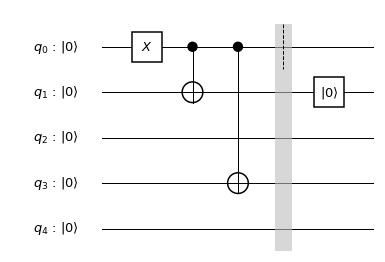

In [31]:
circuit.x(q[0])
circuit.cx(q[0],q[1])
circuit.cx(q[0],q[3])
circuit.barrier()
circuit.reset(q[1])
circuit.draw(output='mpl')

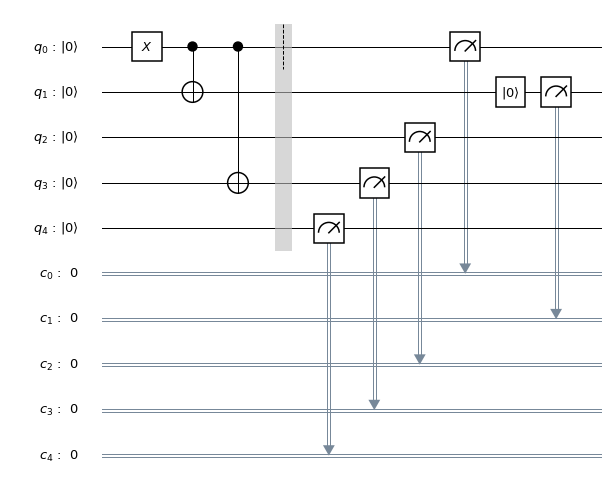

In [32]:
circuit.add_register(c)
circuit.measure(q,c)
circuit.draw(output='mpl')

In [33]:
shot_times=1
max_credits=3
# IBMQ.load_accounts()
# backend=IBMQ.get_backend('ibmq_qasm_simulator')
backend=BasicAer.get_backend('qasm_simulator')
start=time()
start
job_exp = execute(circuit, backend, shots=shot_times, max_credits=max_credits)
job_monitor(job_exp)
end=time()
print(end-start)
result=job_exp.result()
end=time()
print(end-start)
counts = result.get_counts(circuit)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

2.053969144821167
2.0544843673706055


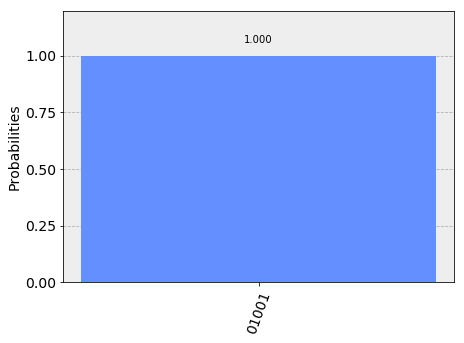

In [34]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)